#  Crime Analysis in Victoria

## Initial Data Cleaning

In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the dataset for crimes recorded in Victoria
vic_crimes = pd.read_csv("Data/crime_table2.csv", low_memory=False).dropna(how='any')
vic_crimes["Year"] = vic_crimes["Year"].astype(int)
vic_crimes.head()

In [ ]:
# Get relevant columns
clean_crimes = vic_crimes[["Year", "Local Government Area", "Offence Division", "Offence Subdivision", 
                     "Incidents Recorded", "LGA Rate per 100,000 population"]]
clean_crimes.head()

## Crime Rates in All LGAs in 2023

In [ ]:
# Filter to only show data by Local Government Area and LGA Rate per 100,000 population for year 2023
crime_23 = clean_crimes.loc[clean_crimes["Year"] == 2023]
crime_all_LGAs = crime_23.groupby("Local Government Area")["LGA Rate per 100,000 population"].sum().reset_index()
crime_all_LGAs_sorted = crime_all_LGAs.sort_values(by="LGA Rate per 100,000 population", ascending=True)  
crime_all_LGAs_sorted.head()

In [ ]:
#Plot a horozontal bar chart to show all data clearly.

plt.figure(figsize=(10, 16))

plt.barh(crime_all_LGAs_sorted["Local Government Area"], 
         crime_all_LGAs_sorted["LGA Rate per 100,000 population"],
         color='indigo')

plt.title("Crime Rate by Local Government Area for 2023")
plt.xlabel("LGA Rate per 100,000 population")

plt.yticks(crime_all_LGAs_sorted["Local Government Area"], fontsize=12)

plt.grid(axis='x', linestyle='-')
plt.ylim(-0.75, len(crime_all_LGAs_sorted["Local Government Area"]) - 0.25)

plt.savefig('Visualisation Images/crime rate all LGAs 2023.png', bbox_inches='tight')


## Crime Rates in Top 10 LGAs in 2023

In [ ]:
# Filter to only show data by top 10 Local Government Area and LGA Rate per 100,000 population for year 2023
crime_23 = clean_crimes.loc[clean_crimes["Year"] == 2023]
crime_all_LGAs = crime_23.groupby("Local Government Area")["LGA Rate per 100,000 population"].sum().reset_index()
crime_all_LGAs_sorted = crime_all_LGAs.sort_values(by="LGA Rate per 100,000 population", ascending=False)

top_10_LGAs = crime_all_LGAs_sorted.head(10)
top_10_LGAs

In [ ]:
# Plotting the top 10 Local Government Areas based on crime rate
plt.figure(figsize=(14, 12))
plt.barh(top_10_LGAs["Local Government Area"], top_10_LGAs["LGA Rate per 100,000 population"], color='lightcoral')
plt.title("Top 10 Local Government Area for Crime rate 2023")
plt.xlabel("LGA Rate per 100,000 population")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='-')
plt.savefig('Visualisation Images/top 10 LGA crime rate 2023.png', bbox_inches='tight')


## Crime Rates for Top 10 LGAs  over the period 2014-2023 

In [ ]:
# Define the list of desired Local Government Areas
desired_LGAs = ['Melbourne', 'Latrobe', 'Mildura', 'Yarra', 'Port Phillip',
                'Greater Dandenong', 'Horsham', "Ararat", 'Greater Shepparton', 'Maribyrnong']

# Filter the DataFrame to include only the desired LGAs and years
filtered_crimes = clean_crimes[(clean_crimes['Year'] >= 2014) & (clean_crimes['Year'] <= 2023) &
                                (clean_crimes['Local Government Area'].isin(desired_LGAs))]

# Group by Year and Local Government Area, and sum the 'LGA Rate per 100,000 population' column
LGA_crime_2014_to_2023 = filtered_crimes.groupby(['Year', 'Local Government Area'])['LGA Rate per 100,000 population'].sum().reset_index()
LGA_crime_2014_to_2023.head()

In [ ]:

# Plotting the line chart
plt.figure(figsize=(12, 16))  # Adjust the figure size as needed
for LGA in desired_LGAs:
    LGA_data = LGA_crime_2014_to_2023[LGA_crime_2014_to_2023['Local Government Area'] == LGA]
    plt.plot(LGA_data['Year'], LGA_data['LGA Rate per 100,000 population'], label=LGA)

plt.title('Top 10 LGAs Crime Rate over the period 2014-2023')
plt.xlabel('Years')
plt.ylabel('LGA Rate per 100,000 population')
plt.legend()
plt.grid(True)

# Set x-axis limits and ticks to start from the very beginning
plt.xlim(2014, 2023)  # Set the x-axis limits from 2014 to 2023
plt.xticks(range(2014, 2024))  

plt.tight_layout()  

plt.savefig('Visualisation Images/top 10 LGA crime rate over the period 2014-2023.png')



## Divisions of Crime in 2023 

In [ ]:
# To create a dataframe for showing crime incidents recorded by offence division. 
# Group by 'Offence Division' and sum the 'Incidents Recorded' column
divisions_group = crime_23.groupby("Offence Division")['Incidents Recorded'].sum()

# Create a DataFrame from the grouped data
division_incidents = pd.DataFrame(divisions_group).reset_index()
division_incidents['Offence Division'] = division_incidents['Offence Division'].apply(lambda x: x[1:])
division_incidents

In [ ]:
#Plotting the pie chart
division_incidents['Percentage'] = (division_incidents['Incidents Recorded'] / division_incidents['Incidents Recorded'].sum()) * 100
plt.figure(figsize=(8, 8))
colours = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "red", "violet"]
explode = [0, 0.05, 0, 0, 0, 0]
plt.pie(division_incidents['Incidents Recorded'], autopct='%.02f%%', colors=colours, radius=1,
        startangle=28, explode=explode, pctdistance=1.2)
plt.title("Major Divisions of Offences by Incidents Recorded in 2023", x=0.7)

plt.legend(division_incidents['Offence Division'], loc=(1.07, 0.3), title="Offence Divisions")


plt.tight_layout()

plt.savefig('Visualisation Images/major division of offences for 2023.png')


In [ ]:
## To create a dataframe for showing crime incidents recorded by offence subdivision. 
crimes_by_subdivision = clean_crimes.loc[clean_crimes["Year"] == 2023]
crimes_by_subdivision = crimes_by_subdivision.groupby(['Offence Subdivision'])["Incidents Recorded"].sum().reset_index()
crimes_by_subdivision_sorted = crimes_by_subdivision.sort_values(by="Incidents Recorded", ascending=False)
crimes_by_subdivision_sorted['Offence Subdivision'] = crimes_by_subdivision_sorted['Offence Subdivision'].apply(lambda x: x[3:])
crimes_by_subdivision_sorted_on = crimes_by_subdivision_sorted.head(10)

crimes_by_subdivision_sorted.head()

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(14, 12))
plt.barh(crimes_by_subdivision_sorted_on['Offence Subdivision'], crimes_by_subdivision_sorted_on['Incidents Recorded'], color='navy')
plt.xlabel('Incidents Recorded')
plt.title('Top 10 Offence Subdivisions by Incidents Recorded in 2023')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='-')
plt.savefig('Visualisation Images/top 10 Offence subdivisions by incidents recorded.png')

In [ ]:
# Filter data on Top 10 LGAs by Offence Division for 2023. 

crimes_by_subdivision = clean_crimes.loc[clean_crimes["Year"] == 2023]

# Group by "Local Government Area" and "Offence Division", summing up "LGA Rate per 100,000 population"
crimes_by_subdivision = crimes_by_subdivision.groupby(["Local Government Area", 'Offence Division'])["LGA Rate per 100,000 population"].sum().reset_index()

crimes_by_subdivision['Offence Division'] = crimes_by_subdivision['Offence Division'].apply(lambda x: x[1:])
crimes_by_subdivision.head()

In [ ]:
 # List of selected LGAs
selected_lgas = ['Melbourne', 'Latrobe', 'Mildura', 'Yarra', 'Port Phillip', 'Greater Dandenong', 'Horsham', 'Ararat', 'Greater Shepparton', 'Maribyrnong']


# Filter the DataFrame to include only the selected LGAs
selected_crimes = crimes_by_subdivision[crimes_by_subdivision['Local Government Area'].isin(selected_lgas)]

# Sort the selected crimes DataFrame by "Offence Division" and "LGA Rate per 100,000 population" in descending order
selected_crimes_sorted = selected_crimes.sort_values(by=["Offence Division", "LGA Rate per 100,000 population"], ascending=[True, False])

# Reset the index to make 'Local Government Area' a column again
selected_crimes_sorted.reset_index(drop=True, inplace=True)

# Pivot the DataFrame to have 'Offence Division' as columns
pivoted_crimes = selected_crimes_sorted.pivot(index='Local Government Area', columns='Offence Division', values='LGA Rate per 100,000 population')

# Calculate the total sum of each Offence Division and sort the columns (Offence Divisions) by these sums in descending order
sorted_columns = pivoted_crimes.sum().sort_values(ascending=False).index
pivoted_crimes = pivoted_crimes[sorted_columns]

# Calculate the total sum of each LGA and sort the rows (LGAs) by these sums in descending order
sorted_rows = pivoted_crimes.sum(axis=1).sort_values(ascending=False).index
pivoted_crimes = pivoted_crimes.loc[sorted_rows]


# Adjust keys in colors_dict by stripping leading/trailing spaces
colors_dict = {
    'Crimes against the person': 'gold',
    'Property and deception offences': 'yellowgreen',
    'Drug offences': 'lightcoral',
    'Public order and security offences': 'lightskyblue',
    'Justice procedures offences': 'red',
    'Other offences': 'violet'
}


# Strip leading/trailing spaces from pivoted_crimes columns before using them as keys
pivoted_crimes.columns = pivoted_crimes.columns.str.strip()

# Plotting the stacked bar chart
ax = pivoted_crimes.plot(kind='barh', stacked=True, figsize=(12, 12), color=[colors_dict[col] for col in pivoted_crimes.columns])
plt.title('Stacked Bar Chart for Top 10 LGAs by Offence Division for 2023')
plt.xlabel('LGA Rate per 100,000 population')
ax.set_ylabel('')
plt.legend(title='Offence Division')
plt.tight_layout()
plt.gca().invert_yaxis()

plt.savefig('Visualisation Images/stacked bar Chart for top 10 LGAs by offence division for 2023.png')




## Crime Rates for Major Offence Divisions over the period 2014-2023

In [ ]:
# Group by Year and Offence Division, and sum the 'Incidents Recorded' column
division_crime_2014_to_2023 = clean_crimes.groupby(['Year', 'Offence Division'])['LGA Rate per 100,000 population'].sum().reset_index()
division_crime_2014_to_2023['Offence Division'] = division_crime_2014_to_2023['Offence Division'].apply(lambda x: x[1:])
division_crime_2014_to_2023.head()

In [ ]:
# Plotting the line chart
plt.figure(figsize=(14, 10))  # Set the figure size
for division in division_crime_2014_to_2023['Offence Division'].unique():
    data = division_crime_2014_to_2023[division_crime_2014_to_2023['Offence Division'] == division]
    plt.plot(data['Year'], data['LGA Rate per 100,000 population'], label=division)

plt.xlabel('Years')  # Label for x-axis
plt.ylabel('LGA Rate per 100,000 population')  
plt.title('Crime Rate by Offence Division over the period 2014-2023')  
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xlim(2014, 2023)  
plt.xticks(range(2014, 2024))

# Set the range for the y-axis (adjust these values as needed)
plt.ylim(0, division_crime_2014_to_2023['LGA Rate per 100,000 population'].max() * 1.2)  # 20% higher than the maximum value

# Show y-axis labels spaced 30,000 apart
plt.yticks(np.arange(0, division_crime_2014_to_2023['LGA Rate per 100,000 population'].max() * 1.2, step=30000))

plt.savefig('Visualisation Images/crime rate by Offence Division over the period 2014-2023.png')


## Regression Analysis

In [21]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [22]:
#Read data
crime_and_economic_data_df = pd.read_csv("Data/crime_and_economic_data.csv")
crime_and_economic_data_df.head(11)
crime_and_economic_data_df

,Year,"Total LGA Crime Rate per 100,000 population","Property and deception offences Crime Rate per 100,000 population","Crimes against the person Crime Rate per 100,000 population",Average unemployment rate (Annual %),Average inflation rate (Annual %)
0,2014,326023.89,255167.29,70856.60,6.59,2.35
1,2015,342917.89,271006.89,71911.00,6.11,1.35
2,2016,374887.70,293118.11,81769.59,5.83,1.50
3,2017,337245.23,254775.00,82470.23,5.97,2.28
4,2018,331071.57,248374.87,82696.70,4.99,2.23
5,2019,341048.40,258613.15,82435.25,4.75,1.55
6,2020,298382.39,216877.93,81504.46,6.45,1.25
7,2021,288009.32,204586.13,83423.19,5.06,2.28
8,2022,285175.82,204335.81,80840.01,3.76,6.50
9,2023,317711.81,235520.41,82191.40,3.79,5.28


In [23]:
# Define the dependent and independent variables
y = crime_and_economic_data_df['Total LGA Crime Rate per 100,000 population']
X = crime_and_economic_data_df[['Average unemployment rate (Annual %)', 'Average inflation rate (Annual %)']]

# Convert X to a StatsModels data structure by adding a constant term
X = sm.add_constant(X)

# Convert y to a NumPy array
y = y.values

# Fit the regression model
Total_LGA_Crime= sm.OLS(y, X).fit()

# Print the regression summary
print(Total_LGA_Crime.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.277
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.337
Time:                        15:57:04   Log-Likelihood:                -114.44
No. Observations:                  10   AIC:                             234.9
Df Residuals:                       7   BIC:                             235.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


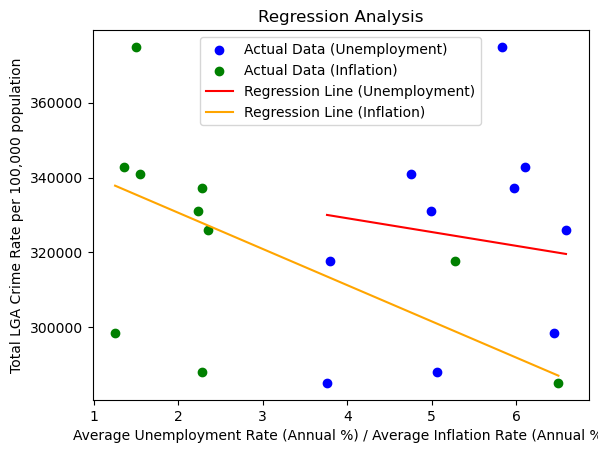

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for the independent variable (e.g., Average Unemployment Rate)
x_range_unemployment = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)

# Define a range of values for the other independent variable (e.g., Average Inflation Rate)
x_range_inflation = np.linspace(X.iloc[:, 2].min(), X.iloc[:, 2].max(), 100)

# Calculate predicted values using the regression equation for both variables
predicted_values_unemployment = model.params[0] + model.params[1] * x_range_unemployment + model.params[2] * X.iloc[:, 2].mean()
predicted_values_inflation = model.params[0] + model.params[1] * X.iloc[:, 1].mean() + model.params[2] * x_range_inflation

# Scatter plot of the actual data points
plt.scatter(X.iloc[:, 1], y, label='Actual Data (Unemployment)', color='blue')
plt.scatter(X.iloc[:, 2], y, label='Actual Data (Inflation)', color='green')

# Plotting the regression line for both variables
plt.plot(x_range_unemployment, predicted_values_unemployment, label='Regression Line (Unemployment)', color='red')
plt.plot(x_range_inflation, predicted_values_inflation, label='Regression Line (Inflation)', color='orange')

# Adding labels and legend
plt.xlabel('Average Unemployment Rate (Annual %) / Average Inflation Rate (Annual %)')
plt.ylabel('Total LGA Crime Rate per 100,000 population')
plt.title('Regression Analysis')
plt.legend()

# Display the plot
plt.show()
